# Assignment 8
#### by Anchalee P Ramirez
Using any dataset that has a categorical feature that needs to be predicted, use several algorithms, preprocessing techniques, feature extraction techniques to fit the data to the model and show the accuracy, confusion matrix, and the classification report. G
https://www.kaggle.com/ntnu-testimon/paysim1
https://www.kaggle.com/joniarroba/noshowappointments
https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In this assignment, I chose `default of credit card clients` dataset. I want to examine relationship between credit default and clients' characteristics (such as gender, education, marital status, age, credit balance of client, and history of past payment)

In [2]:
creditcard = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/7 Garbage In, Garbage Out (Data Muging)_Extracting Relevant Features from the Data/default of credit card clients.csv')
creditcard.dropna(inplace=True)

In [3]:
creditcard.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [4]:
creditcard.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
creditcard.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

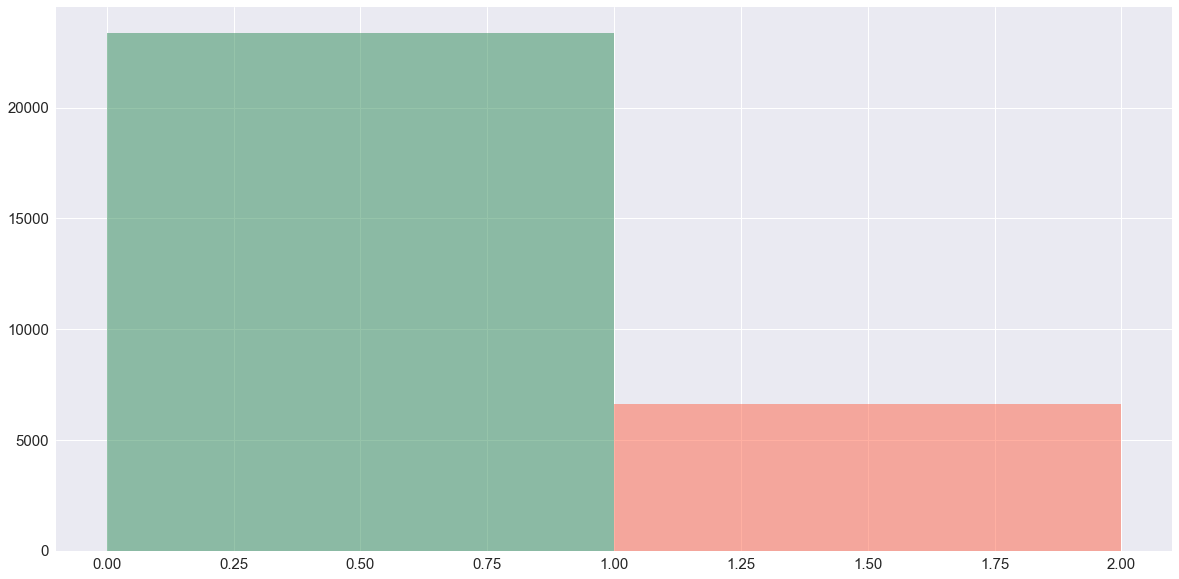

In [7]:
creditcard[creditcard.default==0].default.hist(bins = np.arange(0,3,1), alpha = 0.5, color = 'seagreen')
creditcard[creditcard.default==1].default.hist(bins = np.arange(0,3,1), alpha = 0.5, color = 'tomato')

In [8]:
print(np.amin(creditcard.LIMIT_BAL), np.amax(creditcard.LIMIT_BAL), 
      np.mean(creditcard.LIMIT_BAL), np.median(creditcard.LIMIT_BAL))

10000 1000000 167484.32266666667 140000.0


(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

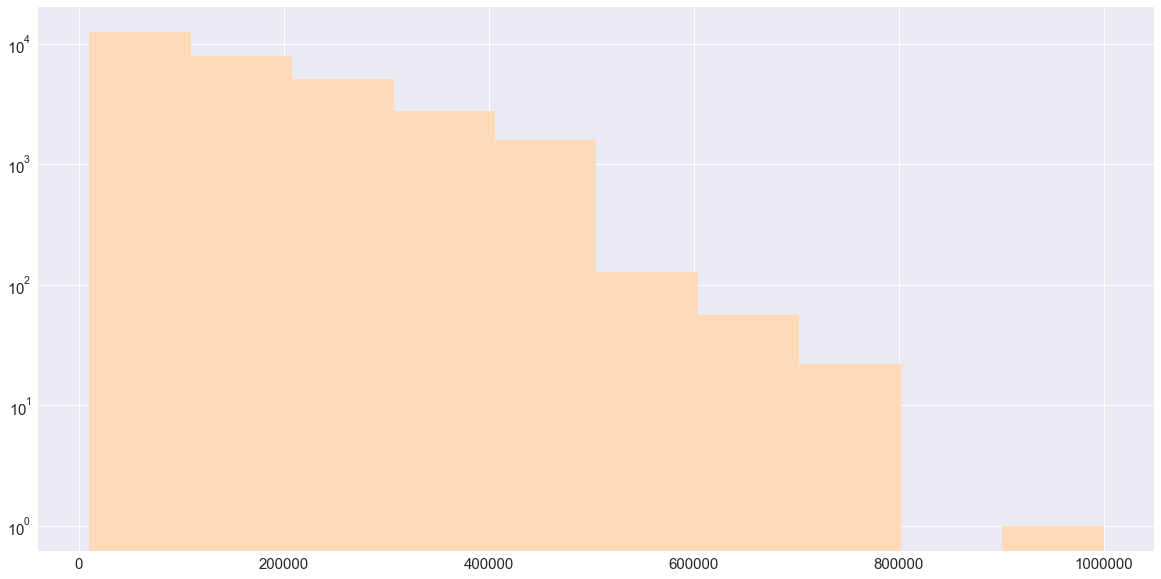

In [9]:
plt.hist(creditcard.LIMIT_BAL, color = 'peachpuff', log=True)

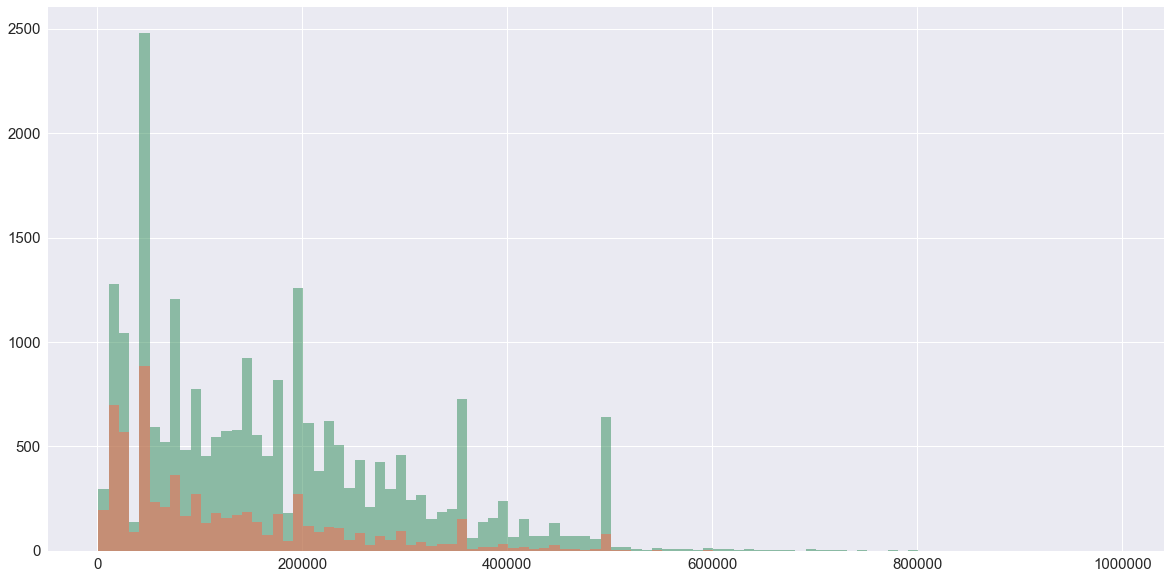

In [10]:
creditcard[creditcard.default==0].LIMIT_BAL.hist(bins = np.arange(1000,1000000,10000), 
alpha = 0.5, color = 'seagreen')
creditcard[creditcard.default==1].LIMIT_BAL.hist(bins = np.arange(1000,1000000,10000), 
alpha = 0.5, color = 'tomato')

In [11]:
creditcard.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

(array([11888., 18112.]), array([1, 2, 3]), <a list of 2 Patch objects>)

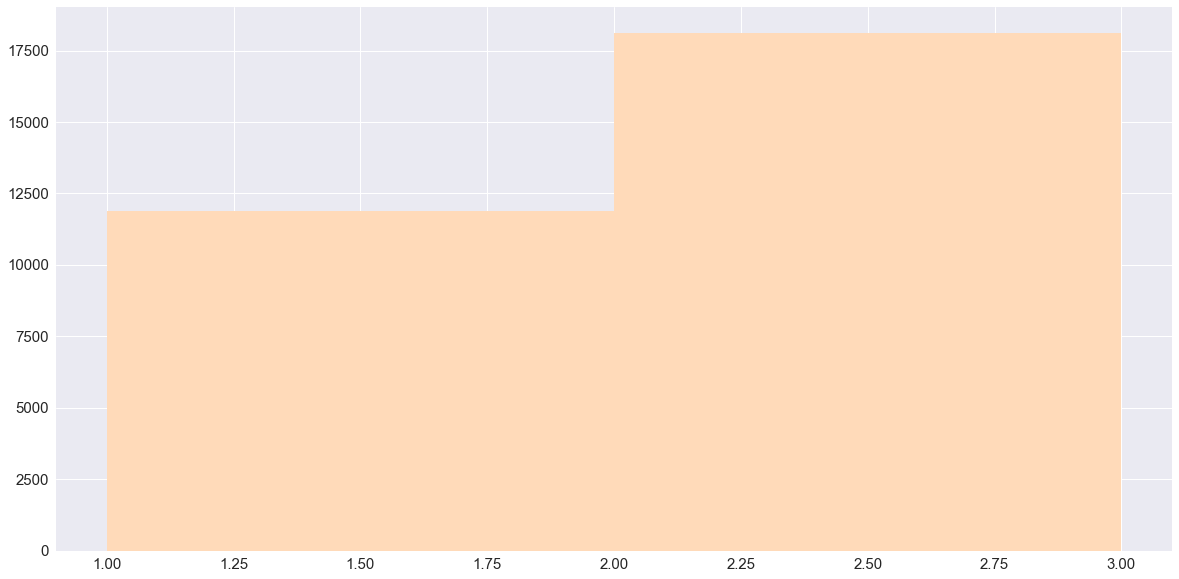

In [12]:
plt.hist(creditcard.SEX, bins = np.arange(1,4,1), color = 'peachpuff')

In [13]:
creditcard.groupby([creditcard.SEX, creditcard.default]).count()

ID  LIMIT_BAL  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
SEX default                                                               
1   0         9015       9015       9015      9015   9015   9015   9015   
    1         2873       2873       2873      2873   2873   2873   2873   
2   0        14349      14349      14349     14349  14349  14349  14349   
    1         3763       3763       3763      3763   3763   3763   3763   

             PAY_3  PAY_4  PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  \
SEX default                         ...                                       
1   0         9015   9015   9015    ...          9015       9015       9015   
    1         2873   2873   2873    ...          2873       2873       2873   
2   0        14349  14349  14349    ...         14349      14349      14349   
    1         3763   3763   3763    ...          3763       3763       3763   

             BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
SEX default                                                                
1   0             9015      9015      9015      9015      9015      9015   
    1             2873      2873      2873      2873      2873      2873   
2   0            14349     14349     14349     14349     14349     14349   
    1             3763      3763      3763      3763      3763      3763   

             PAY_AMT6  
SEX default            
1   0            9015  
    1            2873  
2   0           14349  
    1            3763  

[4 rows x 23 columns]

In [14]:
creditcard.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

(array([1.4000e+01, 1.0585e+04, 1.4030e+04, 4.9170e+03, 1.2300e+02,
        2.8000e+02, 5.1000e+01]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

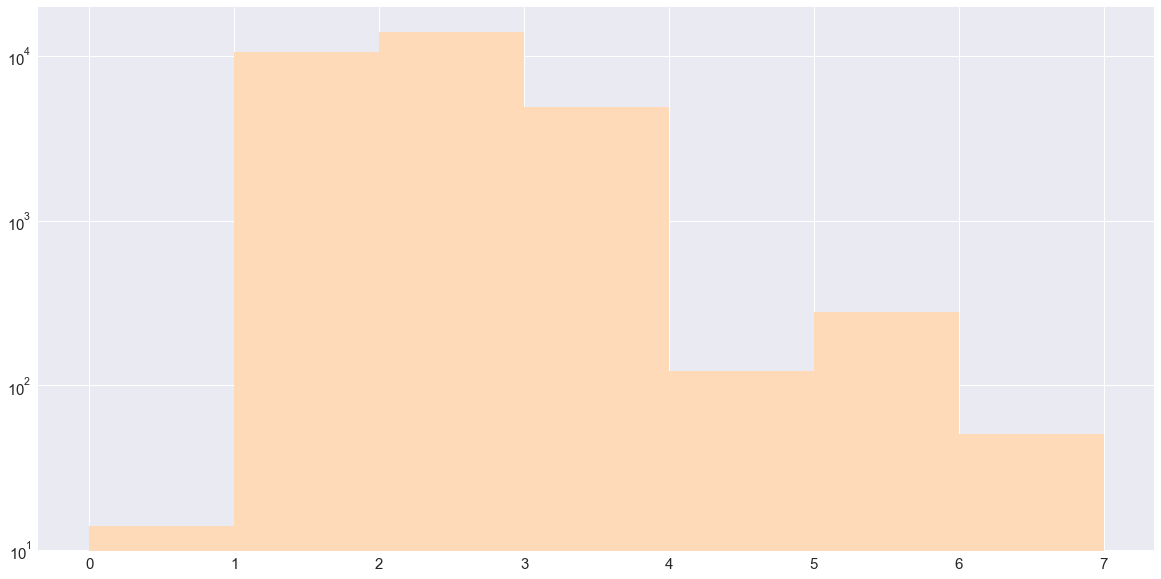

In [15]:
plt.hist(creditcard.EDUCATION, bins = np.arange(0,8,1), color = 'peachpuff', log=True)

In [16]:
creditcard.groupby([creditcard.EDUCATION, creditcard.default]).count()

ID  LIMIT_BAL    SEX  MARRIAGE    AGE  PAY_0  PAY_2  \
EDUCATION default                                                           
0         0           14         14     14        14     14     14     14   
1         0         8549       8549   8549      8549   8549   8549   8549   
          1         2036       2036   2036      2036   2036   2036   2036   
2         0        10700      10700  10700     10700  10700  10700  10700   
          1         3330       3330   3330      3330   3330   3330   3330   
3         0         3680       3680   3680      3680   3680   3680   3680   
          1         1237       1237   1237      1237   1237   1237   1237   
4         0          116        116    116       116    116    116    116   
          1            7          7      7         7      7      7      7   
5         0          262        262    262       262    262    262    262   
          1           18         18     18        18     18     18     18   
6         0           43         43     43        43     43     43     43   
          1            8          8      8         8      8      8      8   

                   PAY_3  PAY_4  PAY_5    ...     BILL_AMT3  BILL_AMT4  \
EDUCATION default                         ...                            
0         0           14     14     14    ...            14         14   
1         0         8549   8549   8549    ...          8549       8549   
          1         2036   2036   2036    ...          2036       2036   
2         0        10700  10700  10700    ...         10700      10700   
          1         3330   3330   3330    ...          3330       3330   
3         0         3680   3680   3680    ...          3680       3680   
          1         1237   1237   1237    ...          1237       1237   
4         0          116    116    116    ...           116        116   
          1            7      7      7    ...             7          7   
5         0          262    262    262    ...           262        262   
          1           18     18     18    ...            18         18   
6         0           43     43     43    ...            43         43   
          1            8      8      8    ...             8          8   

                   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
EDUCATION default                                                       
0         0               14         14        14        14        14   
1         0             8549       8549      8549      8549      8549   
          1             2036       2036      2036      2036      2036   
2         0            10700      10700     10700     10700     10700   
          1             3330       3330      3330      3330      3330   
3         0             3680       3680      3680      3680      3680   
          1             1237       1237      1237      1237      1237   
4         0              116        116       116       116       116   
          1                7          7         7         7         7   
5         0              262        262       262       262       262   
          1               18         18        18        18        18   
6         0               43         43        43        43        43   
          1                8          8         8         8         8   

                   PAY_AMT4  PAY_AMT5  PAY_AMT6  
EDUCATION default                                
0         0              14        14        14  
1         0            8549      8549      8549  
          1            2036      2036      2036  
2         0           10700     10700     10700  
          1            3330      3330      3330  
3         0            3680      3680      3680  
          1            1237      1237      1237  
4         0             116       116       116  
          1               7         7         7  
5         0             262       262       262  
          1              18        18        18  
6        

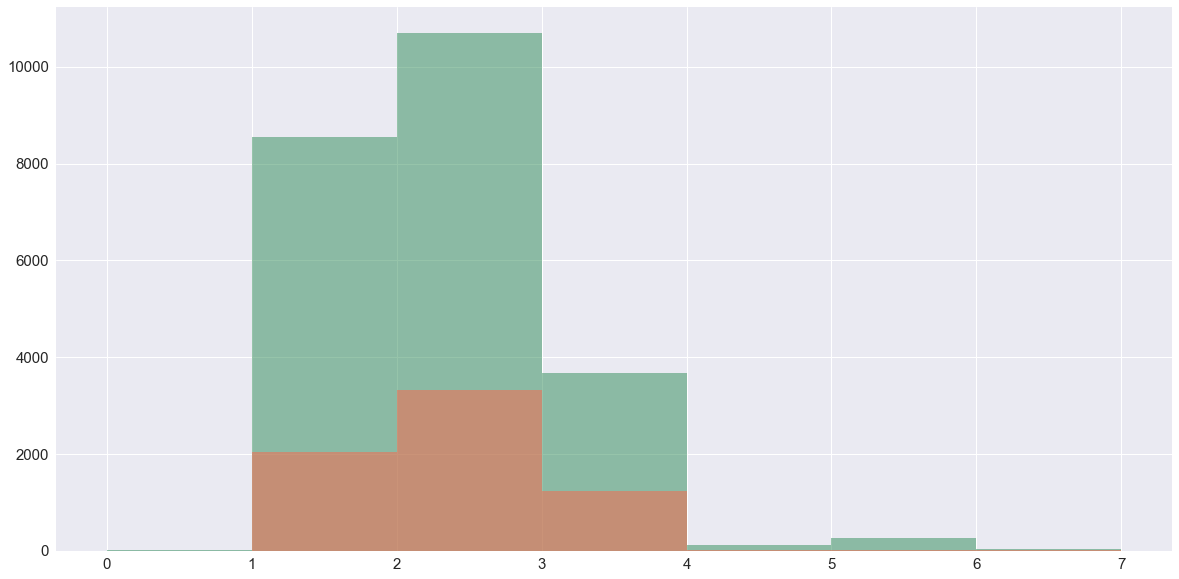

In [17]:
creditcard[creditcard.default==0].EDUCATION.hist(bins = np.arange(0,8,1), alpha = 0.5, color = 'seagreen')
creditcard[creditcard.default==1].EDUCATION.hist(bins = np.arange(0,8,1), alpha = 0.5, color = 'tomato')

In [18]:
creditcard.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

(array([   54., 13659., 15964.,   323.,     0.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

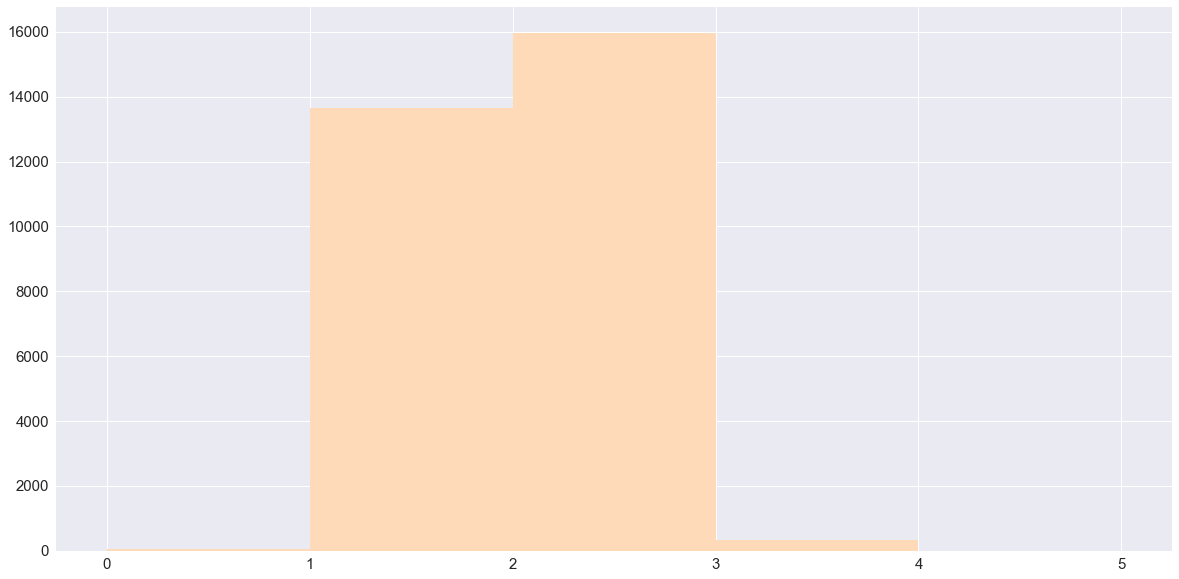

In [19]:
plt.hist(creditcard.MARRIAGE, bins = np.arange(0,6,1), color = 'peachpuff')

In [20]:
creditcard.groupby([creditcard.MARRIAGE, creditcard.default]).count()

ID  LIMIT_BAL    SEX  EDUCATION    AGE  PAY_0  PAY_2  \
MARRIAGE default                                                            
0        0           49         49     49         49     49     49     49   
         1            5          5      5          5      5      5      5   
1        0        10453      10453  10453      10453  10453  10453  10453   
         1         3206       3206   3206       3206   3206   3206   3206   
2        0        12623      12623  12623      12623  12623  12623  12623   
         1         3341       3341   3341       3341   3341   3341   3341   
3        0          239        239    239        239    239    239    239   
         1           84         84     84         84     84     84     84   

                  PAY_3  PAY_4  PAY_5    ...     BILL_AMT3  BILL_AMT4  \
MARRIAGE default                         ...                            
0        0           49     49     49    ...            49         49   
         1            5      5      5    ...             5          5   
1        0        10453  10453  10453    ...         10453      10453   
         1         3206   3206   3206    ...          3206       3206   
2        0        12623  12623  12623    ...         12623      12623   
         1         3341   3341   3341    ...          3341       3341   
3        0          239    239    239    ...           239        239   
         1           84     84     84    ...            84         84   

                  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
MARRIAGE default                                                       
0        0               49         49        49        49        49   
         1                5          5         5         5         5   
1        0            10453      10453     10453     10453     10453   
         1             3206       3206      3206      3206      3206   
2        0            12623      12623     12623     12623     12623   
         1             3341       3341      3341      3341      3341   
3        0              239        239       239       239       239   
         1               84         84        84        84        84   

                  PAY_AMT4  PAY_AMT5  PAY_AMT6  
MARRIAGE default                                
0        0              49        49        49  
         1               5         5         5  
1        0           10453     10453     10453  
         1            3206      3206      3206  
2        0           12623     12623     12623  
         1            3341      3341      3341  
3        0             239       239       239  
         1              84        84        84  

[8 rows x 23 columns]

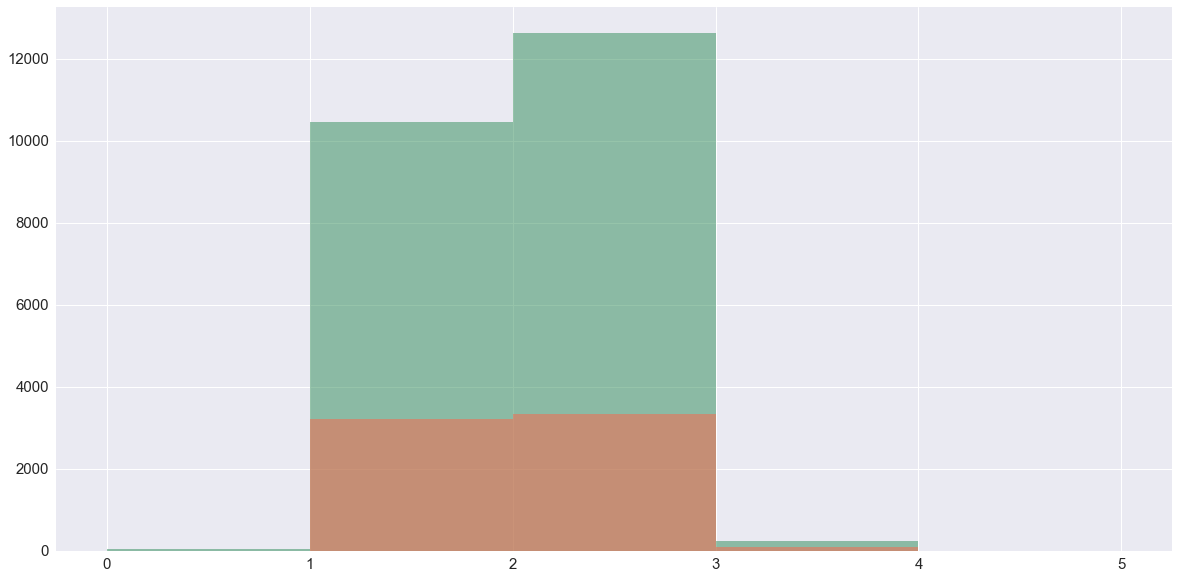

In [21]:
creditcard[creditcard.default==0].MARRIAGE.hist(bins = np.arange(0,6,1), alpha = 0.5, color = 'seagreen')
creditcard[creditcard.default==1].MARRIAGE.hist(bins = np.arange(0,6,1), alpha = 0.5, color = 'tomato')

In [22]:
print(np.amin(creditcard.AGE), np.amax(creditcard.AGE), np.mean(creditcard.AGE), np.median(creditcard.AGE))

21 79 35.4855 34.0


(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

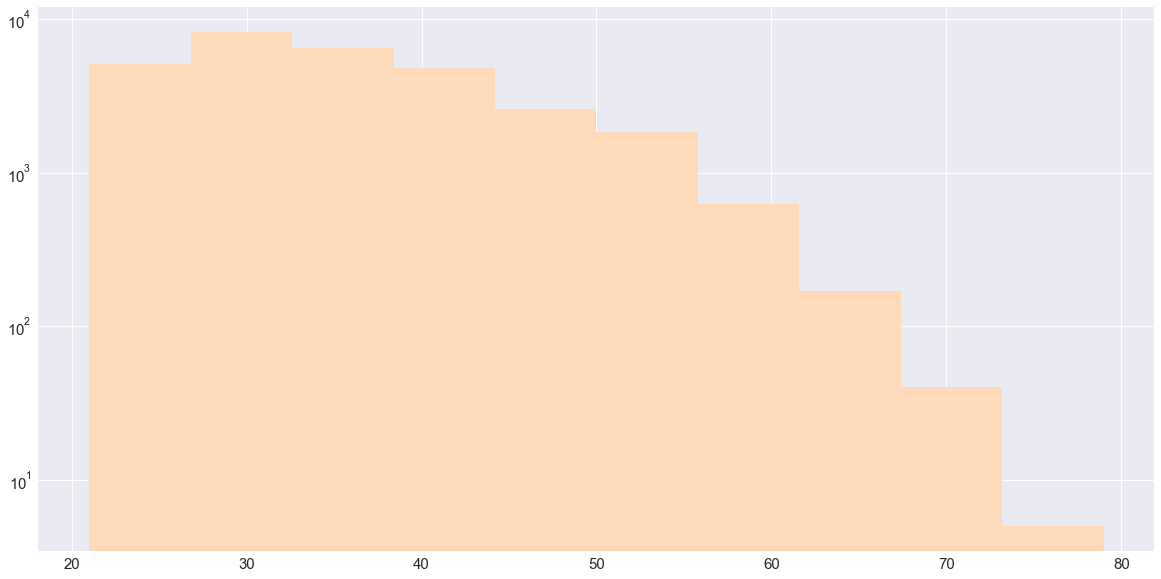

In [23]:
plt.hist(creditcard.AGE, color = 'peachpuff', log=True)

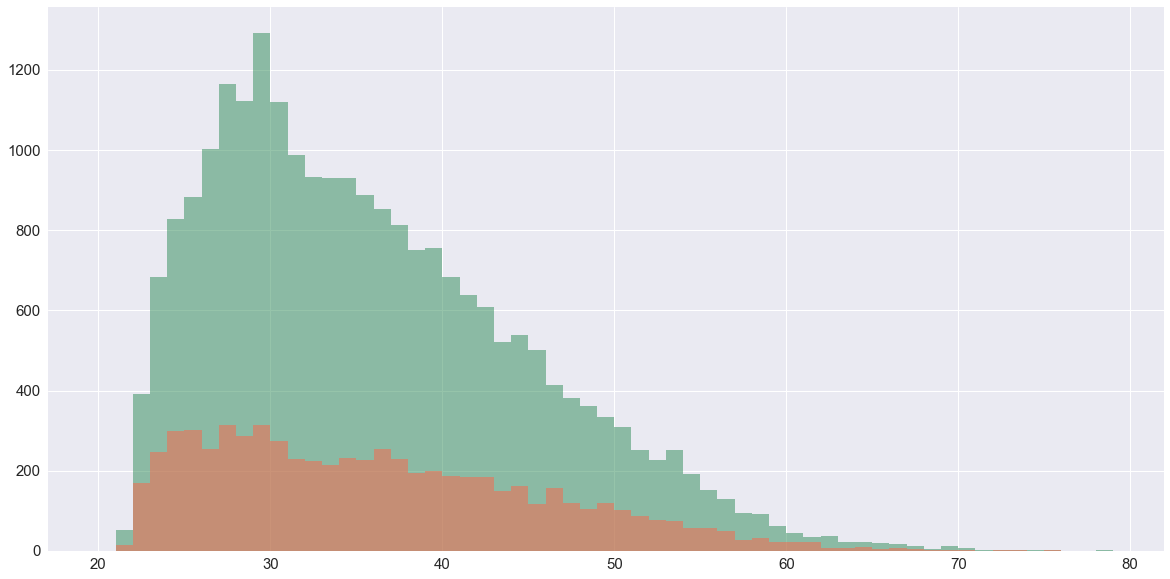

In [24]:
creditcard[creditcard.default==0].AGE.hist(bins = np.arange(20,80,1), alpha = 0.5, color = 'seagreen')
creditcard[creditcard.default==1].AGE.hist(bins = np.arange(20,80,1), alpha = 0.5, color = 'tomato')

In [25]:
Independent_var = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                   'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X = creditcard[Independent_var]

y = creditcard.default

Using linear regression, logistic regression, linear support vector classification (Linear SVC), support vector classification (SVC), and classifier implementing the k-nearest neighbors (KNeighborsClassifier) models to find the relationship between credit default and clients' characteristics.

### 1. Linear regression model

In [26]:
linear = LinearRegression()
linear.fit(X,y)
creditcard['predict_linear'] = linear.predict(X)

In [27]:
linear.coef_

array([-2.38611842e-07, -1.29644689e-02, -1.85040806e-02, -2.61853071e-02,
        1.36800697e-03,  9.45190958e-02,  1.52374117e-02,  1.00084381e-02,
        2.23443515e-03,  4.86995983e-03, -2.23945743e-03])

In [28]:
linear.intercept_

0.31475518760570326

In [29]:
accuracy_score(creditcard.default, creditcard.predict_linear.round())

0.7942666666666667

In [30]:
confusion_matrix(creditcard.default, creditcard.predict_linear.round())

array([[23084,   280],
       [ 5892,   744]], dtype=int64)

In [31]:
print(classification_report(creditcard.default, creditcard.predict_linear.round()))

             precision    recall  f1-score   support

          0       0.80      0.99      0.88     23364
          1       0.73      0.11      0.19      6636

avg / total       0.78      0.79      0.73     30000



The accuracy of linear regression model is approximately 0.79.

### 2. Logistic regression model

In [32]:
logistic = LogisticRegression()
logistic.fit(X,y)
creditcard['predict_logistic'] = logistic.predict(X)

In [33]:
logistic.coef_

array([[-5.26001650e-06, -5.14678586e-04, -6.44289362e-04,
        -5.52566245e-04, -9.07854922e-03,  6.90570340e-04,
         5.47339435e-04,  4.78645063e-04,  4.45863422e-04,
         4.28339092e-04,  4.06060922e-04]])

In [34]:
logistic.intercept_

array([-0.00030049])

In [35]:
accuracy_score(creditcard.default, creditcard.predict_logistic.round())

0.7788

In [36]:
confusion_matrix(creditcard.default, creditcard.predict_logistic.round())

array([[23364,     0],
       [ 6636,     0]], dtype=int64)

In [37]:
print(classification_report(creditcard.default, creditcard.predict_logistic.round()))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88     23364
          1       0.00      0.00      0.00      6636

avg / total       0.61      0.78      0.68     30000



C:\Users\Anchee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy of logistic regression model is around 0.78.

### 3. Linear support vector classification (Linear SVC) model

In [38]:
linearsvc = LinearSVC()
linearsvc.fit(X,y)
creditcard['predict_linearsvc'] = linearsvc.predict(X)

In [39]:
linearsvc.coef_

array([[-8.81146244e-06, -8.42970958e-04, -1.02053648e-03,
        -1.42948721e-03, -4.95821461e-03,  4.57534887e-03,
         4.20896411e-03,  4.07390202e-03,  4.15694566e-03,
         3.75534896e-03,  3.83473577e-03]])

In [40]:
linearsvc.intercept_

array([-0.00056903])

In [41]:
accuracy_score(creditcard.default, creditcard.predict_linearsvc.round())

0.7788

In [42]:
confusion_matrix(creditcard.default, creditcard.predict_linearsvc.round())

array([[23364,     0],
       [ 6636,     0]], dtype=int64)

In [43]:
print(classification_report(creditcard.default, creditcard.predict_linearsvc.round()))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88     23364
          1       0.00      0.00      0.00      6636

avg / total       0.61      0.78      0.68     30000



C:\Users\Anchee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy of linear SVC model is about 0.23.

### 4. Support vector classification (SVC) model

In [44]:
svc = SVC()
svc.fit(X,y)
creditcard['predict_svc'] = svc.predict(X)

In [45]:
svc.intercept_

array([-0.51293732])

In [46]:
accuracy_score(creditcard.default, creditcard.predict_svc.round())

0.8573666666666667

In [47]:
confusion_matrix(creditcard.default, creditcard.predict_svc.round())

array([[22877,   487],
       [ 3792,  2844]], dtype=int64)

In [48]:
print(classification_report(creditcard.default, creditcard.predict_svc.round()))

             precision    recall  f1-score   support

          0       0.86      0.98      0.91     23364
          1       0.85      0.43      0.57      6636

avg / total       0.86      0.86      0.84     30000



The accuracy of SVC model is about 0.86.

### 5. Classifier implementing the k-nearest neighbors (KNeighborsClassifier) model

##### neighbor = 1

In [49]:
Kneighbors1 = KNeighborsClassifier(1)
Kneighbors1.fit(X,y)
creditcard['predict_Kneighbors1'] = Kneighbors1.predict(X)

In [50]:
accuracy_score(creditcard.default, creditcard.predict_Kneighbors1.round())

0.962

In [51]:
confusion_matrix(creditcard.default, creditcard.predict_Kneighbors1.round())

array([[22800,   564],
       [  576,  6060]], dtype=int64)

In [52]:
print(classification_report(creditcard.default, creditcard.predict_Kneighbors1.round()))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98     23364
          1       0.91      0.91      0.91      6636

avg / total       0.96      0.96      0.96     30000



##### neighbor = 3

In [53]:
Kneighbors3 = KNeighborsClassifier(3)
Kneighbors3.fit(X,y)
creditcard['predict_Kneighbors3'] = Kneighbors3.predict(X)

In [54]:
accuracy_score(creditcard.default, creditcard.predict_Kneighbors3.round())

0.8612333333333333

In [55]:
confusion_matrix(creditcard.default, creditcard.predict_Kneighbors3.round())

array([[22400,   964],
       [ 3199,  3437]], dtype=int64)

In [56]:
print(classification_report(creditcard.default, creditcard.predict_Kneighbors3.round()))

             precision    recall  f1-score   support

          0       0.88      0.96      0.91     23364
          1       0.78      0.52      0.62      6636

avg / total       0.85      0.86      0.85     30000



##### neighbor = 5

In [57]:
Kneighbors5 = KNeighborsClassifier()
Kneighbors5.fit(X,y)
creditcard['predict_Kneighbors5'] = Kneighbors5.predict(X)

In [58]:
accuracy_score(creditcard.default, creditcard.predict_Kneighbors5.round())

0.8374666666666667

In [59]:
confusion_matrix(creditcard.default, creditcard.predict_Kneighbors5.round())

array([[22451,   913],
       [ 3963,  2673]], dtype=int64)

In [60]:
print(classification_report(creditcard.default, creditcard.predict_Kneighbors5.round()))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90     23364
          1       0.75      0.40      0.52      6636

avg / total       0.83      0.84      0.82     30000



The accuracy of KNeighborsClassifier models are 0.96, 0.86, and 0.84, respectively. The KNeighborsClassifier model with neighbor equals to 1 has the highest accuracy score.

##### According to the models above, we can see that the KNeighborsClassifier model with neighbor equals to 1 provides the highest accuracy score.

Now, consider the accuracy score of the KNeighborsClassifier model with scale.

In [61]:
Independent_var = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                   'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X = scale(creditcard[Independent_var])

y = creditcard.default

In [62]:
Kneighbors1 = KNeighborsClassifier(1)
Kneighbors1.fit(X,y)
creditcard['predict_Kneighbors1'] = Kneighbors1.predict(X)

In [63]:
accuracy_score(creditcard.default, creditcard.predict_Kneighbors1.round())

0.9631666666666666

In [64]:
confusion_matrix(creditcard.default, creditcard.predict_Kneighbors1.round())

array([[22824,   540],
       [  565,  6071]], dtype=int64)

In [65]:
print(classification_report(creditcard.default, creditcard.predict_Kneighbors1.round()))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98     23364
          1       0.92      0.91      0.92      6636

avg / total       0.96      0.96      0.96     30000



We can see that the accuracy score of the KNeighborsClassifier with scale is slightly higher than the KNeighborsClassifier without scale.

Next, evaluating estimator performance.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size = 0.5, random_state=0)

In [68]:
print(x_train50.shape, y_train50.shape)
print(x_test50.shape, y_test50.shape)

(15000, 11) (15000,)
(15000, 11) (15000,)


In [69]:
valid_model = Kneighbors1.fit(x_train50,y_train50)

valid_model.score(x_test50, y_test50)

0.7241333333333333

After spilt the training set 50%, we can see that the testing score is 0.72.